<a href="https://colab.research.google.com/github/karinefonseca/machine_learning_python_R/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instalação da Bilioteca FPDF

In [2]:
pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=0cd3c0217604e1eaea5db72293f5a1e76bf1830cf23402f30981caa091e8f083
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


##Importação das Bibliotecas


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF

##Carregamento do Dataset


In [4]:
file_path = '/content/Income1.csv'
income_data = pd.read_csv(file_path)

##Definição das Variáveis Explicativa e Dependente

In [5]:
# Extraindo as variáveis explicativa (Education) e dependente (Income)
X = income_data['Education'].values
y = income_data['Income'].values

##Adição do termo de interceptação (bias)

In [6]:
# Adicionando uma coluna de 1s para o termo de interceptação (bias)
X_b = np.c_[np.ones((len(X), 1)), X]  # Matriz X com o bias (intercepto)

##Coeficientes da Regressão Linear

In [7]:
# Calculando os coeficientes w = (X.T * X)^(-1) * X.T * y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Coeficientes da regressão
intercept = theta_best[0]
slope = theta_best[1]

## Previsão dos Valores de Y

In [8]:
# Prevendo os valores de y com base na regressão
y_pred = X_b.dot(theta_best)

 ## Plotagem do Gráfico de Regressão


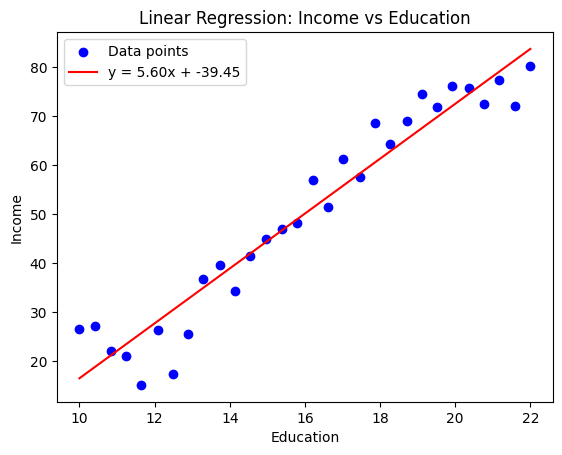

In [9]:
# Gráfico dos pontos e da linha de regressão
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")
plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Linear Regression: Income vs Education')
plt.legend()
plt.savefig('/content/regression_plot.png')
#plt.show()

## Função para cálculo do MSE

In [10]:
def compute_mse_for_w(w_values):
    mse_values = []
    for w in w_values:
        y_pred_w = w * X  # Previsões sem intercepto, apenas variando w. Mostra como o MSE varia apenas com a inclinação o que permite visualizar o impacto direto da inclinação nos erros de previsão.
        mse = np.mean((y - y_pred_w) ** 2)
        mse_values.append(mse)
    return mse_values

## Plotagem do Gráfico da Curva de MSE em função de W

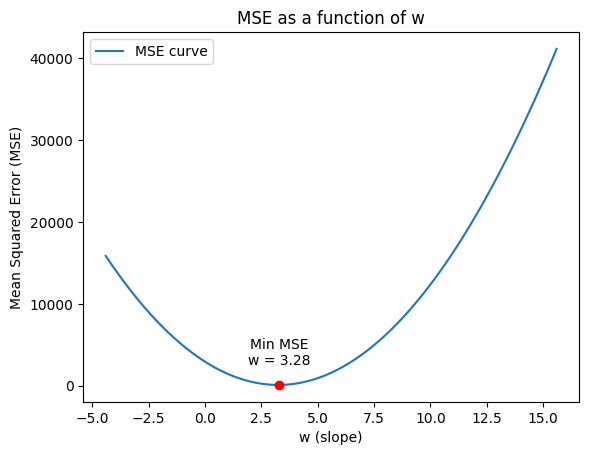

In [23]:
#Erro Quadrático Médio (MSE) para diferentes valores de w (a inclinação, ou slope) em torno da inclinação obtida pela regressão linear
w_values = np.linspace(slope - 10, slope + 10, 100)
mse_values = compute_mse_for_w(w_values)

min_mse = min(mse_values)  # Menor valor de MSE
min_mse_index = mse_values.index(min_mse)  # Índice do menor MSE
best_w = w_values[min_mse_index]  # Valor de w correspondente ao menor MSE

# Plotando a curva de MSE
plt.plot(w_values, mse_values, label='MSE curve')
plt.scatter(best_w, min_mse, color='red', zorder=5)  # Ponto do menor MSE
plt.text(best_w, min_mse + 0.05 * (max(mse_values) - min_mse), f'Min MSE\nw = {best_w:.2f}', fontsize=10, ha='center', va='bottom')
plt.xlabel('w (slope)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE as a function of w')
plt.legend()
plt.savefig('/content/mse_plot.png')
plt.show()

## Criação do Relatório

In [36]:
class PDFReport(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Report: Linear Regression of Income vs Education', 0, 1, 'C')

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(4)

    def chapter_body(self, body):
        self.set_font('Arial', '', 11)
        self.multi_cell(0, 10, body)
        self.ln()

# Inicializando o PDF
pdf = PDFReport()
pdf.add_page()

# Adicionando o título
pdf.chapter_title("Linear Regression of Income vs Education")

# Adicionando o conteúdo
body = (
    "In this report, we performed a linear regression of the 'Income' variable based on the 'Education' variable from the provided dataset.\n"
    "The equation of the regression line is: y = 5.60x - 39.45\n"
    "The Mean Squared Error (MSE) for the best-fit line is: 29.83\n"
    "The Minimun MSE value is: 3.28\n"
    "The first figure shows the scatter plot of the dataset along with the regression line, and the second figure displays the MSE curve as a function of w (slope).\n"
)
pdf.chapter_body(body)

# Adicionando as imagens geradas ao PDF
pdf.image('/content/regression_plot.png', x = 10, y = 103, w = 125)
pdf.image('/content/mse_plot.png', x = 10, y = 195, w = 125)

# Salvando o PDF
pdf_output_path = '/content/linear_regression_report_with_images.pdf'
pdf.output(pdf_output_path)

''

## Principais Resultados

In [27]:
# Exibindo os coeficientes calculados e o MSE para o melhor w
mse_best = np.mean((y - y_pred) ** 2)

print(f"Inclinação (w): {slope}")
print(f"Intercepto: {intercept}")
print(f"MSE: {mse_best}")

Inclinação (w): 5.599482874119939
Intercepto: -39.4462566790965
MSE: 29.82881619900623
